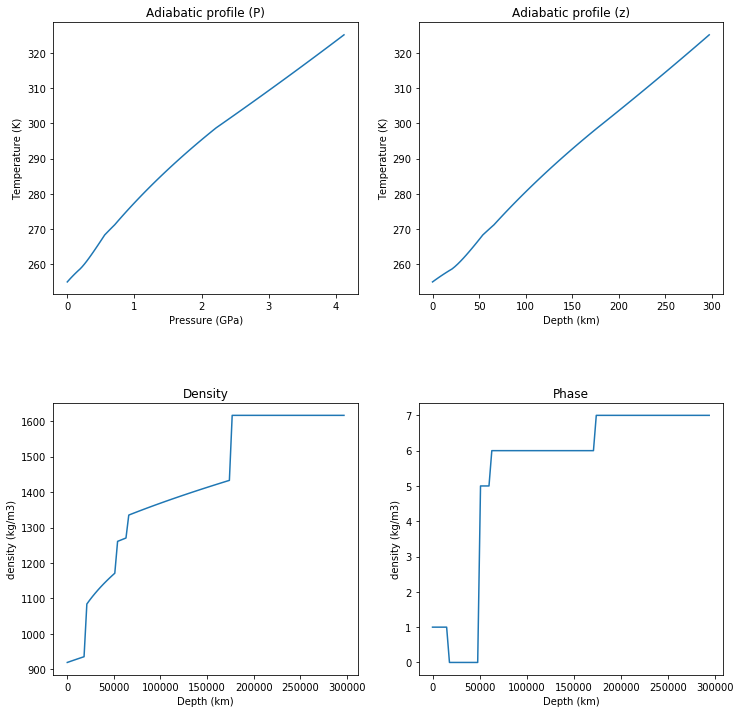

'Mass of water in kg: 2.2204971358325072e+23'

In [346]:
# Computation of a water-rich planetary body adiabatic profile using SeaFreeze thermodynamics
# Baptiste Journaux 2020
import numpy as np
import seafreeze as sf
import matplotlib.pyplot as plt

r_b=6330e3  #Radius rocky core
depth = 300e3;  # Depth of the water layer in m
g=9.81;   # constant Gravity in m/s^2
res = depth/100;  # Resolution in m
P_s=0.1;   # Starting Pressure (MPa)
T_s = [255]   # Starting Temperature (K);


z = np.arange(0, depth, res)  # depth grid
T = np.zeros(z.size)  # Temperature grid
P = np.zeros(z.size)  # Pressure grid
rho = np.zeros(z.size)  # Density grid
alpha = np.zeros(z.size)  # thermal epansivity grid
Cp = np.zeros(z.size)  # Heat capacity grid
dT_dz = np.zeros(z.size)  # thermal gradient grid
phase = np.zeros(z.size)  # phase grid

for j in range(0,len(T_s)):
    PT = np.empty((1,), np.object)
    PT[0] = (P_s, T_s[j])
    phase_s = sf.whichphase(PT)
    if P_s > 2200:
        out.rho = 1.6169e+03
        out.alpha = 2.45e-4
        out.Cp = 3400
        phase_s = 7
    elif phase_s == 0:
        out = sf.seafreeze(PT,'water1')
    elif phase_s == 1:
        out = sf.seafreeze(PT,'Ih')
    elif phase_s == 2:
        out = sf.seafreeze(PT,'II')
    elif phase_s == 3:
        out = sf.seafreeze(PT,'III')
    elif phase_s == 5:
        out = sf.seafreeze(PT,'V')
    elif phase_s == 6:
        out = sf.seafreeze(PT,'VI')
    rho_s = out.rho  # Density
    alpha_s = out.alpha  # Thermal expansivity
    Cp_s = out.Cp  # Heat capacity
    dT_dz_s = alpha_s*g*T_s/Cp_s  # Thermal gradient at the surface


    T[0] = T_s[j]
    P[0] = P_s
    rho[0] = rho_s
    alpha[0] = alpha_s
    Cp[0] = Cp_s
    dT_dz[0] = dT_dz_s[j]
    phase[0] = phase_s
    
    for i in range(0,z.size-1):
        T[i+1] = T[i]+dT_dz[i]*(z[i+1]-z[i]);
        P[i+1] = P[i]+ rho[i] * g * (z[i+1]-z[i])*1e-6;
        PT[0] = (P[i+1],T[i+1])
        
        phase[i+1] = sf.whichphase(PT)
        if P[i+1] > 2200:
            out.rho = 1.6169e+03
            out.alpha = 2.45e-4
            out.Cp = 3400
            phase[i] = 7
        elif phase[i] == 0:
            out = sf.seafreeze(PT,'water1')
        elif phase[i] == 1:
            out = sf.seafreeze(PT,'Ih')
        elif phase[i] == 2:
            out = sf.seafreeze(PT,'II')
        elif phase[i] == 3:
            out = sf.seafreeze(PT,'III')
        elif phase[i] == 5:
            out = sf.seafreeze(PT,'V')
        elif phase[i] == 6:
            out = sf.seafreeze(PT,'VI')
        
        rho[i+1] = out.rho;
        alpha[i+1] = out.alpha;
        Cp[i+1] = out.Cp;
        dT_dz[i+1]=alpha[i+1]*g*T[i+1]/Cp[i+1];
    
    
    fig= plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.xlabel('Pressure (GPa)')
    plt.ylabel('Temperature (K)')
    plt.title('Adiabatic profile (P)')
    plt.plot(P*1e-3, T, '-')
    
    plt.subplot(222) 
    plt.xlabel('Depth (km)')
    plt.ylabel('Temperature (K)')
    plt.title('Adiabatic profile (z)')
    plt.plot(z*1e-3, T, '-')
    
    plt.subplot(223)  
    plt.xlabel('Depth (km)')
    plt.ylabel('density (kg/m3)')
    plt.title('Density')
    plt.plot(z, rho, '-')
    
    plt.subplot(224)  
    plt.xlabel('Depth (km)')
    plt.ylabel('density (kg/m3)')
    plt.title('Phase')
    plt.plot(z, phase, '-')
    
    plt.subplots_adjust(wspace=0.2 , hspace=0.4)
plt.show()


M_L = np.zeros(len(rho))
for i in range(1,len(rho)):
    M_L[i]=rho[i]*4/3*np.pi*((r_b+z[i-1]+res)**3-(r_b+z[i-1])**3)
Mass_WL = np.trapz(M_L)
E_M_WL = Mass_WL/5.9722e24 # Mass Water Layer in Earth mass
O_M_WL = Mass_WL/1.4e21 # Mass Water Layer in Ocean mass (Earth)
'Mass of water in kg: ' + str(Mass_WL) 
#'Mass of water in Earth Mass ' + str(E_M_WL)

In [331]:
2.0436911462925534e+23

3.517916657839405

In [334]:
phase

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 6., 6., 6., 6., 6., 6.,
       6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 0.])